In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind, pearsonr, chi2_contingency, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../data/processed_data/final_merged_dataset.csv', index_col=[0])

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (100, 27)

Column Names: ['Age', 'Gender', 'Annual_Income', 'Family_Type', 'Devices_Owned_Raw', 'Daily_Screen_Time', 'Daily_Study_Hours', 'Physical_1', 'Physical_2', 'Physical_3', 'Physical_4', 'Psychological_1', 'Psychological_2', 'Psychological_3', 'Psychological_4', 'Academic_1', 'Academic_2', 'Academic_3', 'Academic_4', 'Social_1', 'Social_2', 'Social_3', 'Social_4', 'Habit_1', 'Habit_2', 'Habit_3', 'Habit_4']

First 5 rows:


,Age,Gender,Annual_Income,Family_Type,Devices_Owned_Raw,Daily_Screen_Time,Daily_Study_Hours,Physical_1,Physical_2,Physical_3,...,Academic_3,Academic_4,Social_1,Social_2,Social_3,Social_4,Habit_1,Habit_2,Habit_3,Habit_4
CODE,,,,,,,,,,,,,,,,,,,,,
1,2,1,3,2,2,1,4,2,2,1,...,2,1,1,2,1.0,1,1,2,1,2
2,1,1,4,1,4,1,4,4,4,2,...,1,2,2,1,2.0,1,1,4,1,2
3,2,1,3,1,1,2,3,4,2,1,...,1,1,1,2,1.0,1,1,2,1,1
4,1,2,1,1,1,1,4,3,2,1,...,1,2,3,4,2.0,4,1,5,1,4
5,2,2,3,2,1,2,2,3,2,2,...,2,4,2,3,4.0,4,2,3,2,4


# Data Cleaning and Preparation

In [2]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Age                  0
Gender               0
Annual_Income        0
Family_Type          0
Devices_Owned_Raw    0
Daily_Screen_Time    0
Daily_Study_Hours    0
Physical_1           0
Physical_2           0
Physical_3           0
Physical_4           0
Psychological_1      0
Psychological_2      0
Psychological_3      0
Psychological_4      0
Academic_1           0
Academic_2           0
Academic_3           0
Academic_4           0
Social_1             0
Social_2             0
Social_3             1
Social_4             0
Habit_1              0
Habit_2              0
Habit_3              0
Habit_4              0
dtype: int64


# Handle missing values (fill with mean/mode or drop)

In [3]:
# For the row with missing data (row 92), let's drop it for now
df_clean = df.dropna()

In [4]:
# Verify missing values are handled
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())


Missing values after cleaning:
Age                  0
Gender               0
Annual_Income        0
Family_Type          0
Devices_Owned_Raw    0
Daily_Screen_Time    0
Daily_Study_Hours    0
Physical_1           0
Physical_2           0
Physical_3           0
Physical_4           0
Psychological_1      0
Psychological_2      0
Psychological_3      0
Psychological_4      0
Academic_1           0
Academic_2           0
Academic_3           0
Academic_4           0
Social_1             0
Social_2             0
Social_3             0
Social_4             0
Habit_1              0
Habit_2              0
Habit_3              0
Habit_4              0
dtype: int64


In [5]:
# Define column mappings for better interpretation
age_mapping = {1: '10-12', 2: '13-15', 3: '16-18', 4: '19-21'}
gender_mapping = {1: 'Male', 2: 'Female', 3: 'Trans'}
income_mapping = {1: 'Below 50k', 2: 'Below 1 lakh', 3: 'Below 2 lakh', 4: 'Above 2 lakh'}
family_mapping = {1: 'Nuclear', 2: 'Joint', 3: 'Extended'}
devices_mapping = {1: 'Smartphone', 2: 'TV', 3: 'Laptop/Computer', 4: 'Gaming Device'}
screen_time_mapping = {1: '<1 hour', 2: '1-2 hours', 3: '3-4 hours', 4: '>4 hours'}
study_hours_mapping = {1: '<1 hour', 2: '1-2 hours', 3: '2-3 hours', 4: '>3 hours'}

In [6]:
# Create readable versions of categorical variables
df_clean['Age_Group'] = df_clean['Age'].map(age_mapping)
df_clean['Gender_Group'] = df_clean['Gender'].map(gender_mapping)
df_clean['Income_Group'] = df_clean['Annual_Income'].map(income_mapping)
df_clean['Family_Type_Group'] = df_clean['Family_Type'].map(family_mapping)
df_clean['Devices_Group'] = df_clean['Devices_Owned_Raw'].map(devices_mapping)
df_clean['Screen_Time_Group'] = df_clean['Daily_Screen_Time'].map(screen_time_mapping)
df_clean['Study_Hours_Group'] = df_clean['Daily_Study_Hours'].map(study_hours_mapping)

# Section 1: Test of Significance, Mean Impact, and p-value

In [7]:
# Create composite scores for each domain
df_clean['Physical_Score'] = df_clean[['Physical_1', 'Physical_2', 'Physical_3', 'Physical_4']].mean(axis=1)
df_clean['Psychological_Score'] = df_clean[['Psychological_1', 'Psychological_2', 'Psychological_3', 'Psychological_4']].mean(axis=1)
df_clean['Academic_Score'] = df_clean[['Academic_1', 'Academic_2', 'Academic_3', 'Academic_4']].mean(axis=1)
df_clean['Social_Score'] = df_clean[['Social_1', 'Social_2', 'Social_3', 'Social_4']].mean(axis=1)
df_clean['Habit_Score'] = df_clean[['Habit_1', 'Habit_2', 'Habit_3', 'Habit_4']].mean(axis=1)

In [8]:
# Calculate overall health impact score
df_clean['Overall_Health_Impact'] = (df_clean['Physical_Score'] + df_clean['Psychological_Score'] + 
                                    df_clean['Academic_Score'] + df_clean['Social_Score'] + 
                                    df_clean['Habit_Score']) / 5


In [9]:
# Display descriptive statistics
print("Descriptive Statistics for Health Impact Scores:")
health_scores = ['Physical_Score', 'Psychological_Score', 'Academic_Score', 'Social_Score', 'Habit_Score', 'Overall_Health_Impact']
print(df_clean[health_scores].describe())

Descriptive Statistics for Health Impact Scores:
       Physical_Score  Psychological_Score  Academic_Score  Social_Score  \
count       99.000000            99.000000       99.000000     99.000000   
mean         2.646465             2.507576        2.641414      1.959596   
std          0.698039             0.659946        0.824653      0.733411   
min          1.000000             1.000000        1.000000      1.000000   
25%          2.250000             2.000000        2.000000      1.500000   
50%          2.750000             2.500000        2.750000      2.000000   
75%          3.125000             3.000000        3.000000      2.500000   
max          5.000000             4.000000        4.500000      4.250000   

       Habit_Score  Overall_Health_Impact  
count    99.000000              99.000000  
mean      2.290404               2.409091  
std       0.735148               0.513062  
min       1.000000               1.300000  
25%       1.750000               2.075000  
50

# T-tests for significance comparing high vs low screen time groups

In [10]:
# Define high screen time as >2 hours (categories 3 and 4)
df_clean['High_Screen_Time'] = df_clean['Daily_Screen_Time'].apply(lambda x: 1 if x >= 3 else 0)

# Perform t-tests for each domain
domains = ['Physical_Score', 'Psychological_Score', 'Academic_Score', 'Social_Score', 'Habit_Score', 'Overall_Health_Impact']
results = []

for domain in domains:
    low_screen = df_clean[df_clean['High_Screen_Time'] == 0][domain]
    high_screen = df_clean[df_clean['High_Screen_Time'] == 1][domain]
    
    t_stat, p_value = ttest_ind(high_screen, low_screen)
    mean_diff = high_screen.mean() - low_screen.mean()
    
    results.append({
        'Domain': domain,
        'Mean_High_Screen': high_screen.mean(),
        'Mean_Low_Screen': low_screen.mean(),
        'Mean_Difference': mean_diff,
        'T-Statistic': t_stat,
        'P-Value': p_value,
        'Significant': p_value < 0.05
    })

# Create results dataframe
significance_results = pd.DataFrame(results)
print("Significance Test Results (High vs Low Screen Time):")
print(significance_results)

Significance Test Results (High vs Low Screen Time):
                  Domain  Mean_High_Screen  Mean_Low_Screen  Mean_Difference  \
0         Physical_Score          3.069444         2.552469         0.516975   
1    Psychological_Score          2.847222         2.432099         0.415123   
2         Academic_Score          3.152778         2.527778         0.625000   
3           Social_Score          2.361111         1.870370         0.490741   
4            Habit_Score          2.958333         2.141975         0.816358   
5  Overall_Health_Impact          2.877778         2.304938         0.572840   

   T-Statistic   P-Value  Significant  
0     2.951919  0.003961         True  
1     2.476364  0.015005         True  
2     3.027232  0.003161         True  
3     2.645232  0.009524         True  
4     4.697261  0.000009         True  
5     4.728697  0.000008         True  


# Section 2: Correlation Analysis (Pearson's)

Correlation Analysis Results:
                  Domain  Correlation_Coefficient   P-Value  Significant
0         Physical_Score                 0.158335  0.117513        False
1    Psychological_Score                 0.211865  0.035272         True
2         Academic_Score                 0.280415  0.004934         True
3           Social_Score                 0.209946  0.037005         True
4            Habit_Score                 0.460657  0.000002         True
5  Overall_Health_Impact                 0.379766  0.000106         True


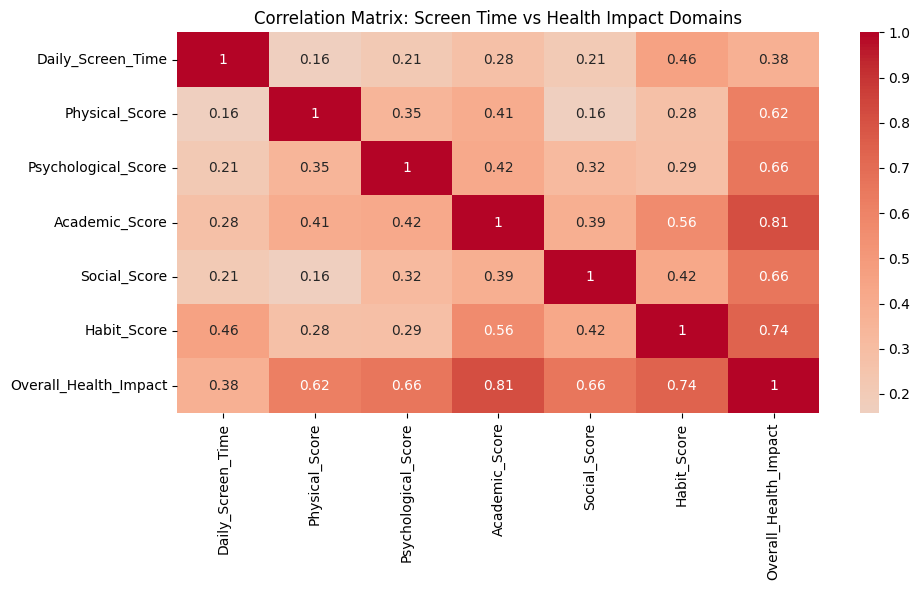

In [11]:
# Calculate correlation between screen time and health impact scores
correlation_results = []

for domain in domains:
    corr, p_value = pearsonr(df_clean['Daily_Screen_Time'], df_clean[domain])
    
    correlation_results.append({
        'Domain': domain,
        'Correlation_Coefficient': corr,
        'P-Value': p_value,
        'Significant': p_value < 0.05
    })

correlation_df = pd.DataFrame(correlation_results)
print("Correlation Analysis Results:")
print(correlation_df)

# Visualize the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[['Daily_Screen_Time'] + domains].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Screen Time vs Health Impact Domains')
plt.tight_layout()
plt.show()

# Section 3: Association Analysis with Demographic Variables

Association Analysis Results:
        Variable  Chi-Square   P-Value  Cramers_V  Significant
0            Age   21.899946  0.001262   0.332574         True
1         Gender    1.220195  0.748165   0.111019        False
2  Annual_Income   14.122164  0.118046   0.218058        False
3    Family_Type    3.743174  0.711385   0.137495        False
4  Devices_Owned    4.327978  0.888531   0.120716        False
5    Study_Hours   10.101287  0.342348   0.184421        False


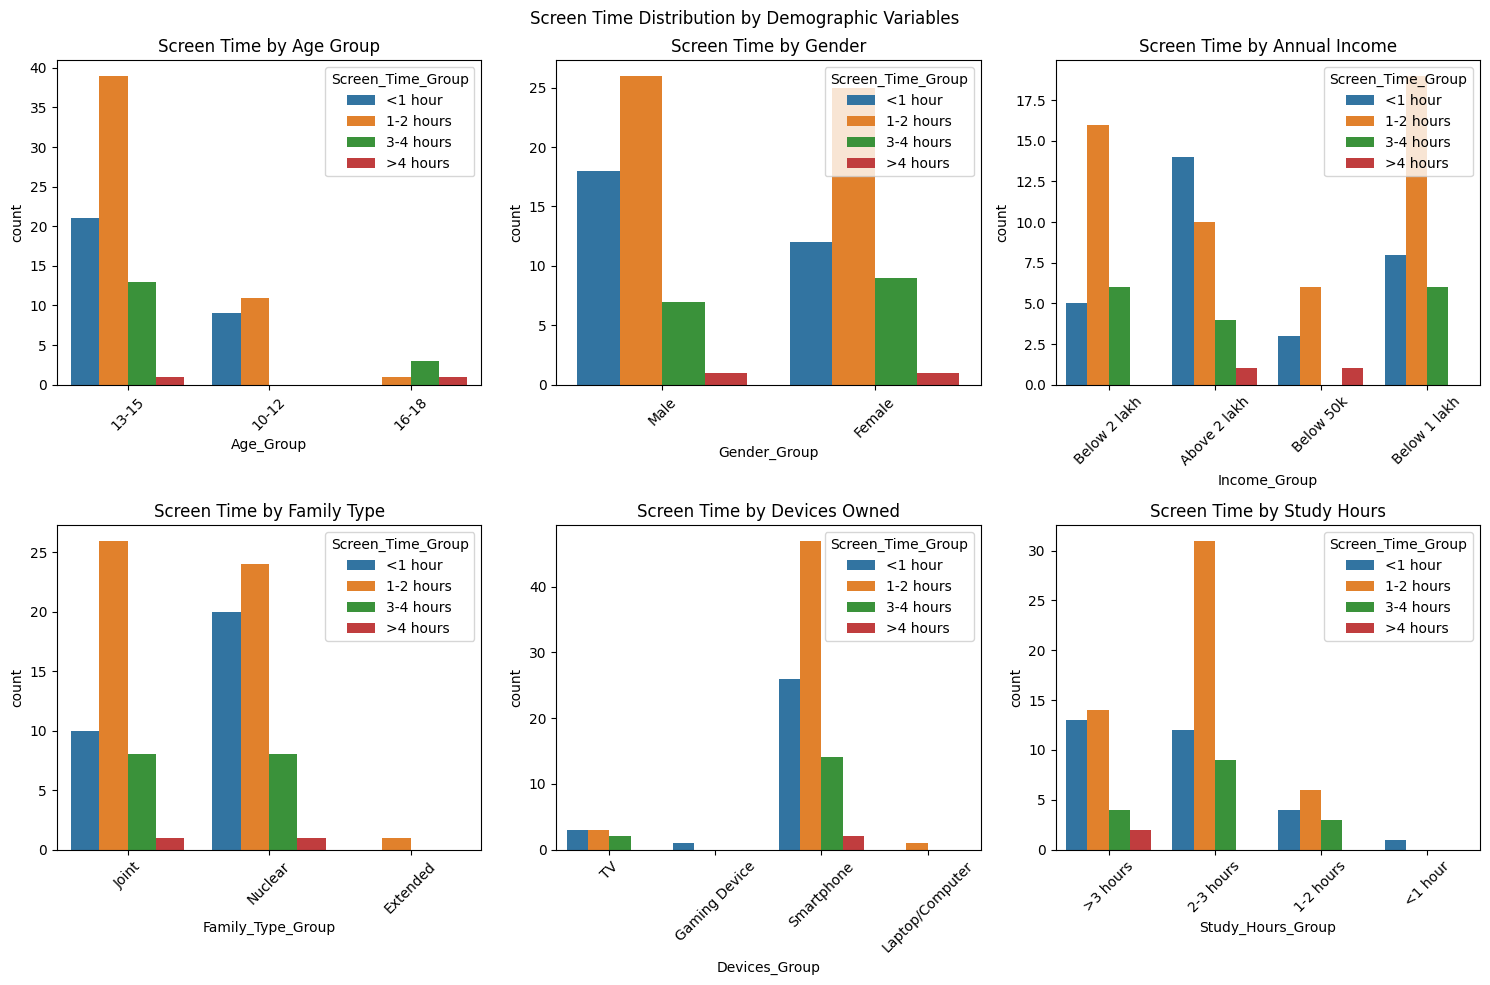

In [12]:

# Function to calculate association between screen time and categorical variables
def analyze_association(categorical_var, var_name):
    # Create contingency table
    contingency_table = pd.crosstab(df_clean[categorical_var], df_clean['Daily_Screen_Time'])
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Cramer's V for effect size
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    return {
        'Variable': var_name,
        'Chi-Square': chi2,
        'P-Value': p_value,
        'Cramers_V': cramers_v,
        'Significant': p_value < 0.05
    }

# Analyze associations
association_results = []

# Age association
association_results.append(analyze_association('Age', 'Age'))

# Gender association
association_results.append(analyze_association('Gender', 'Gender'))

# Annual Income association
association_results.append(analyze_association('Annual_Income', 'Annual_Income'))

# Family Type association
association_results.append(analyze_association('Family_Type', 'Family_Type'))

# Devices Owned association
association_results.append(analyze_association('Devices_Owned_Raw', 'Devices_Owned'))

# Study Hours association
association_results.append(analyze_association('Daily_Study_Hours', 'Study_Hours'))

association_df = pd.DataFrame(association_results)
print("Association Analysis Results:")
print(association_df)

# Visualize screen time distribution by demographic variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Screen Time Distribution by Demographic Variables')

variables = ['Age_Group', 'Gender_Group', 'Income_Group', 'Family_Type_Group', 'Devices_Group', 'Study_Hours_Group']
titles = ['Age Group', 'Gender', 'Annual Income', 'Family Type', 'Devices Owned', 'Study Hours']

for i, (var, title) in enumerate(zip(variables, titles)):
    row, col = i // 3, i % 3
    sns.countplot(data=df_clean, x=var, hue='Screen_Time_Group', ax=axes[row, col])
    axes[row, col].set_title(f'Screen Time by {title}')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional Analysis: Multiple Regression to understand combined effects

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Prepare data for regression
X = df_clean[['Age', 'Gender', 'Annual_Income', 'Family_Type', 'Devices_Owned_Raw', 'Daily_Study_Hours']]
y = df_clean['Daily_Screen_Time']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Get coefficients
coefficients = pd.DataFrame({
    'Variable': ['Age', 'Gender', 'Annual_Income', 'Family_Type', 'Devices_Owned', 'Study_Hours'],
    'Coefficient': model.coef_
})

print("Multiple Regression Coefficients for Predicting Screen Time:")
print(coefficients.sort_values('Coefficient', key=abs, ascending=False))

# Calculate R-squared
r_squared = model.score(X_scaled, y)
print(f"\nR-squared: {r_squared:.3f}")

Multiple Regression Coefficients for Predicting Screen Time:
        Variable  Coefficient
0            Age     0.262679
3    Family_Type     0.079520
1         Gender     0.074500
4  Devices_Owned    -0.033620
5    Study_Hours    -0.024428
2  Annual_Income    -0.023590

R-squared: 0.160


In [14]:
import pickle

In [15]:
# To save our results for the reporting notebook
import pickle

# Saving our analysis results
analysis_results = {
    'significance_results': significance_results,
    'correlation_df': correlation_df,
    'association_df': association_df,
    'coefficients': coefficients,
    'domains': domains,
    # We cann add any other variables that we want to save
}

with open('../models/analysis_results.pkl', 'wb') as f:
    pickle.dump(analysis_results, f)

print("Analysis results saved for reporting notebook")

Analysis results saved for reporting notebook


In [16]:
df_clean.to_csv('../data/processed_data/clean_df.csv', index=False)